In [142]:
# Import Tensor Flow
import tensorflow as tf

# from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

# Import Dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="darkgrid")

In [143]:
# Create Path Variable
PATH = 'data/'

# Join Image Data Folder to Data Path
predict_dir = os.path.join(PATH,"image_data")

In [144]:
#Create Model Parameters
batch_size = 50
epochs = 30
IMG_HEIGHT = 200
IMG_WIDTH = 200
IMG_SHAPE=(200,200,3)

In [145]:
# Generator for our prediction data
predict_image_generator = ImageDataGenerator(rescale= 1/255.0) 

In [146]:
# Link Generator to Prediction Directory
predict_im_gen = predict_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=predict_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           shuffle='true')                                                     
predict_im_gen.next()

Found 50 images belonging to 5 classes.


(array([[[[0.2509804 , 0.3137255 , 0.41176474],
          [0.2392157 , 0.3019608 , 0.40000004],
          [0.23529413, 0.29803923, 0.39607847],
          ...,
          [0.23137257, 0.2901961 , 0.3803922 ],
          [0.21568629, 0.27058825, 0.37254903],
          [0.24313727, 0.29803923, 0.4039216 ]],
 
         [[0.21568629, 0.2784314 , 0.37647063],
          [0.2509804 , 0.3137255 , 0.41176474],
          [0.23529413, 0.29803923, 0.39607847],
          ...,
          [0.21960786, 0.2784314 , 0.36862746],
          [0.21568629, 0.27058825, 0.37254903],
          [0.21176472, 0.26666668, 0.37254903]],
 
         [[0.23137257, 0.29411766, 0.3921569 ],
          [0.24313727, 0.30588236, 0.4039216 ],
          [0.21568629, 0.2784314 , 0.37647063],
          ...,
          [0.21960786, 0.2784314 , 0.36862746],
          [0.227451  , 0.28235295, 0.38431376],
          [0.21960786, 0.27450982, 0.3803922 ]],
 
         ...,
 
         [[0.227451  , 0.28235295, 0.38823533],
          [0.21568

In [147]:
# Load TensorFlow Model
tensor_flow_model = tf.keras.models.load_model('models/tensorflow_model_scratch.h5')

In [148]:
# Predict Tensorflow Batch
art_fight_tensorflow = tensor_flow_model.predict_generator(predict_im_gen)

In [149]:
y_true = np.array([
      [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]
])

y_pred = (art_fight_tensorflow> .5)

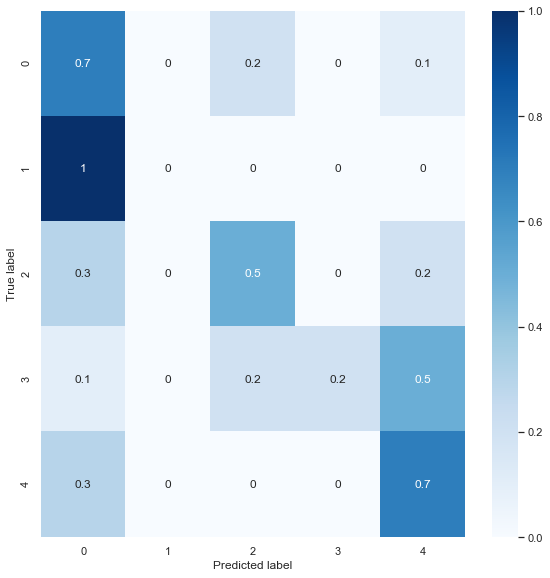

In [150]:
confusion_matrix = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1), normalize="true")

con_mat_df = pd.DataFrame(confusion_matrix)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()